In [1]:
#import warnings; warnings.filterwarnings(action='ignore')
#get_ipython().run_line_magic('matplotlib', 'inline')
#for Netcdf manipulation
import xarray as xr
from netCDF4 import Dataset
import netCDF4 as nc

#for array manipulation
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Grouper

#for plotting
#import cartopy.feature as cfeature
import matplotlib.pylab as plt
from mpl_toolkits.basemap import Basemap # plots maps
from matplotlib.cbook import dedent

import cmocean


In [2]:
# In[2]:
#Reading files with xarray
sit_file = '/Users/fridaperez/Developer/repos/local_repo/SIT_25000/SIT_SH_Filled-316x332.nc'  # prepping path for xr
data_sit = xr.open_dataset(sit_file) # opening sit for xarray


# In[3]:

# Here we want to read the SIV files using the nc package
sit_nc = nc.Dataset("/Users/fridaperez/Developer/repos/local_repo/SIT_25000/SIT_SH_Filled-316x332.nc") #reading SIV from nc
#reading in SIV variables 02-11
time = sit_nc.variables['time'][:]  #sit time
lat=sit_nc.variables['latitude'][:]
lon=sit_nc.variables['longitude'][:]
sit=sit_nc.variables['SIT'][:,:,:]


In [3]:

# ## Monthly
# # Use .groupby('time.month') to organize the data into months
# # then use .groups to extract the indices for each month
month_idxs = data_sit.SIT.groupby('time.month').mean('time',keep_attrs=True)
print(month_idxs)

<xarray.DataArray 'SIT' (month: 6, ygrid: 332, xgrid: 316)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan,

In [4]:
# In[ ]:
# # Extract the january months by selecting
# the relevant indices
gs_may=month_idxs.sel(month=5)
gs_jun=month_idxs.sel(month=6)
gs_jul=month_idxs.sel(month=7)
gs_aug=month_idxs.sel(month=8)
gs_sep=month_idxs.sel(month=9)
gs_octo=month_idxs.sel(month=10)

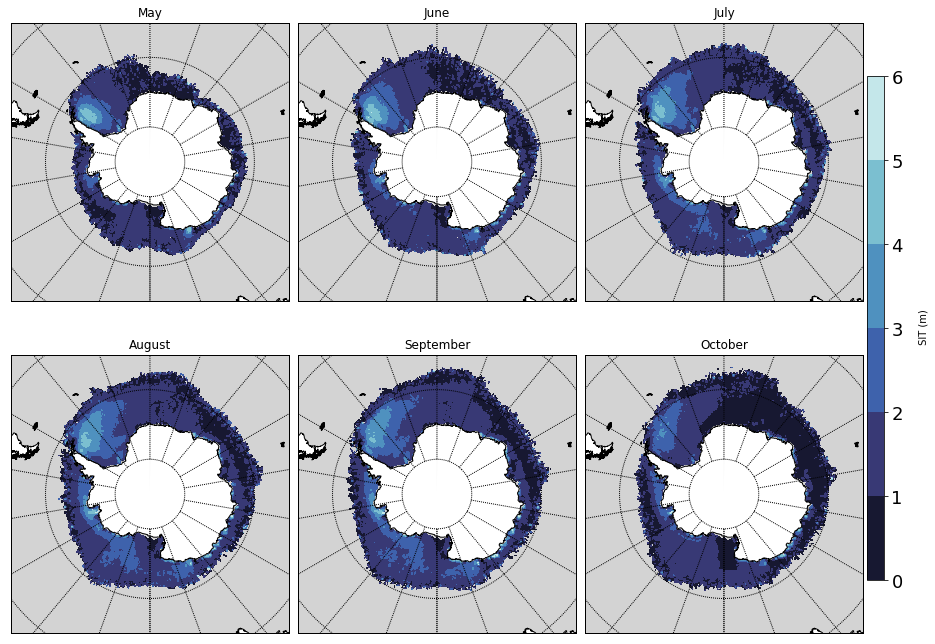

In [5]:
#import matplotlib
#matplotlib.use('PS')
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap # plots maps
#plt.style.use('dark_background')
fig = plt.figure(figsize=[12,10])

#May
ax = fig.add_subplot(231)
ax.set_title("May")
m = Basemap(projection= 'spaeqd',boundinglat=-50,lon_0=-180,resolution='l')
x, y = m(lon, lat)
m.fillcontinents(color='white',lake_color='white')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,0.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='lightgrey')
cmap0 = plt.cm.get_cmap('jet', 11)
clr2=m.contourf(x,y,gs_may,40,cmap= cmocean.cm.ice, levels=[0,1,2,3,4,5,6])
#transform=ccrs.SouthPolarStereo()

#June
ax = fig.add_subplot(232)
ax.set_title("June")

j = Basemap(projection= 'spaeqd',boundinglat=-50,lon_0=-180,resolution='l')
x, y = j(lon, lat)
j.fillcontinents(color='white',lake_color='white')
j.drawcoastlines()
j.drawparallels(np.arange(-80.,0.,20.))
j.drawmeridians(np.arange(-180.,181.,20.))
j.drawmapboundary(fill_color='lightgrey')
cmap0 = plt.cm.get_cmap('jet', 11)
j.contourf(x,y,gs_jun,40,cmap= cmocean.cm.ice,levels=[0,1,2,3,4,5,6])
#transform=ccrs.SouthPolarStereo()

#July
ax = fig.add_subplot(233)
ax.set_title("July")
jj = Basemap(projection= 'spaeqd',boundinglat=-50,lon_0=-180,resolution='l')
x, y = jj(lon, lat)
jj.fillcontinents(color='white',lake_color='white')
jj.drawcoastlines()
jj.drawparallels(np.arange(-80.,0.,20.))
jj.drawmeridians(np.arange(-180.,181.,20.))
jj.drawmapboundary(fill_color='lightgrey')
cmap0 = plt.cm.get_cmap('jet', 11)
jj.contourf(x,y,gs_jul,40,cmap= cmocean.cm.ice,levels=[0,1,2,3,4,5,6])
#transform=ccrs.SouthPolarStereo()

#August
ax = fig.add_subplot(234)
ax.set_title("August")
a = Basemap(projection= 'spaeqd',boundinglat=-50,lon_0=-180,resolution='l')
x, y = a(lon, lat)
a.fillcontinents(color='white',lake_color='white')
a.drawcoastlines()
a.drawparallels(np.arange(-80.,0.,20.))
a.drawmeridians(np.arange(-180.,181.,20.))
a.drawmapboundary(fill_color='lightgrey')
cmap0 = plt.cm.get_cmap('jet', 11)
a.contourf(x,y,gs_aug,40,cmap= cmocean.cm.ice,levels=[0,1,2,3,4,5,6])
#transform=ccrs.SouthPolarStereo()

#September
ax = fig.add_subplot(235)
ax.set_title("September")
s = Basemap(projection= 'spaeqd',boundinglat=-50,lon_0=-180,resolution='l')
x, y = s(lon, lat)
s.fillcontinents(color='white',lake_color='white')
s.drawcoastlines()
s.drawparallels(np.arange(-80.,0.,20.))
s.drawmeridians(np.arange(-180.,181.,20.))
s.drawmapboundary(fill_color='lightgrey')
cmap0 = plt.cm.get_cmap('jet', 11)
s.contourf(x,y,gs_sep,40,cmap= cmocean.cm.ice,levels=[0,1,2,3,4,5,6])
#transform=ccrs.SouthPolarStereo()

#October
ax = fig.add_subplot(236)
ax.set_title("October")
oc = Basemap(projection= 'spaeqd',boundinglat=-50,lon_0=-180,resolution='l')
x, y = oc(lon, lat)
oc.fillcontinents(color='white',lake_color='white')
oc.drawcoastlines()
oc.drawparallels(np.arange(-80.,0.,20.))
oc.drawmeridians(np.arange(-180.,181.,20.))
oc.drawmapboundary(fill_color='lightgrey')
cmap0 = plt.cm.get_cmap('jet', 11)
oc.contourf(x,y,gs_octo,40,cmap= cmocean.cm.ice,levels=[0,1,2,3,4,5,6])
#transform=ccrs.SouthPolarStereo()

#fig.suptitle(u'Monthly sea ice volume \n  2003-2011', fontsize=15, y=1)
plt.subplots_adjust(wspace=0.05, hspace=0.05, right=0.8)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#cbar_ax = fig.add_axes([-0.05, 0.15, 0.02, 0.7])
cbar_axx = fig.add_axes([1, 0.15, 0.02, 0.7])
cbar_axx.tick_params(labelsize=18)

fig.colorbar(clr2,cax=cbar_axx,label= u'\n SIT (m)')

# saving figure #
plt.savefig('/Users/fridaperez/Developer/repos/local_repo/pub_plots/months_sit.png', dpi=300, bbox_inches='tight')

# showing figure #
plt.show()

